# 튜토리얼 파트 2 Word Vectors
- 딥러닝 기법인 Word2Vec을 통해 단어를 벡터화해본다.
- t-SNE를 통해 벡터화한 데이터를 시각화해본다.
- 딥러닝과 지도학습의 랜덤포레스트를 사용하는 하이브리드 방식을 사용한다.

# Word2Vec(Word Embedding to Vector)
### Gensim을 이용한다 (토픽 모델링 지원하는 패키지)

In [1]:
# 출력이 너무 길어지지 않게 하기 위해 찍지 않도록 했으나
# 실제 학습할 때는 아래 두 줄을 주석처리 하는 것을 권장한다.
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

train = pd.read_csv('word_tutorial/labeledTrainData.tsv', header=0, delimiter='\t', quoting=3)
test = pd.read_csv('word_tutorial/testData.tsv', header=0, delimiter='\t', quoting=3)
unlabeled_train = pd.read_csv('word_tutorial/unlabeledTrainData.tsv', header=0, delimiter='\t', quoting=3)

print(train.shape)
print(test.shape)
print(unlabeled_train.shape)

print(train['review'].size)
print(test['review'].size)
print(unlabeled_train['review'].size)

(25000, 3)
(25000, 2)
(50000, 2)
25000
25000
50000


In [3]:
from KaggleWord2VecUtility import KaggleWord2VecUtility

KaggleWord2VecUtility.review_to_wordlist(train['review'][0])[:5]

['with', 'all', 'this', 'stuff', 'go']

In [4]:
sentences = []
for review in train['review']:
    sentences += KaggleWord2VecUtility.review_to_sentences(review, remove_stopwords=False)
for review in unlabeled_train["review"]:
    sentences += KaggleWord2VecUtility.review_to_sentences(review, remove_stopwords=False)

In [6]:
sentences[0][:10]

['with', 'all', 'this', 'stuff', 'go', 'down', 'at', 'the', 'moment', 'with']

In [7]:
sentences[1][:10]

['mayb', 'i', 'just', 'want', 'to', 'get', 'a', 'certain', 'insight', 'into']

In [9]:
len(sentences)

795538

## Gensim을 통한 벡터화 & t-SNE로 시각화
- 위에서 전처리한 것은 stopword를 제거하지 않았다

In [10]:
import logging
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s',
    level=logging.INFO
)

In [11]:
# 파라메터값 지정
num_features = 300 # 문자 벡터 차원 수
min_word_count = 40 # 최소 문자 수
num_workers = 4 # 병렬 처리 스레드 수
context = 10 # 문자열 창 크기
downsampling = 1e-3 # 문자 빈도수 Downsample

In [12]:
# 초기화 및 모델 학습
from gensim.models import word2vec

model = word2vec.Word2Vec(sentences,
                         workers=num_workers,
                         size=num_features,
                         min_count=min_word_count,
                         window=context,
                         sample=downsampling)
model

2019-03-14 13:08:57,719 : INFO : collecting all words and their counts
2019-03-14 13:08:57,721 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-03-14 13:08:57,756 : INFO : PROGRESS: at sentence #10000, processed 225803 words, keeping 12465 word types
2019-03-14 13:08:57,790 : INFO : PROGRESS: at sentence #20000, processed 451892 words, keeping 17070 word types
2019-03-14 13:08:57,821 : INFO : PROGRESS: at sentence #30000, processed 671314 words, keeping 20370 word types
2019-03-14 13:08:57,856 : INFO : PROGRESS: at sentence #40000, processed 897814 words, keeping 23125 word types
2019-03-14 13:08:57,889 : INFO : PROGRESS: at sentence #50000, processed 1116962 words, keeping 25365 word types
2019-03-14 13:08:57,921 : INFO : PROGRESS: at sentence #60000, processed 1338403 words, keeping 27283 word types
2019-03-14 13:08:57,955 : INFO : PROGRESS: at sentence #70000, processed 1561579 words, keeping 29024 word types
2019-03-14 13:08:57,988 : INFO : PROGRESS: 

2019-03-14 13:09:00,142 : INFO : PROGRESS: at sentence #720000, processed 16105664 words, keeping 83037 word types
2019-03-14 13:09:00,180 : INFO : PROGRESS: at sentence #730000, processed 16332045 words, keeping 83572 word types
2019-03-14 13:09:00,217 : INFO : PROGRESS: at sentence #740000, processed 16553078 words, keeping 84128 word types
2019-03-14 13:09:00,254 : INFO : PROGRESS: at sentence #750000, processed 16771405 words, keeping 84600 word types
2019-03-14 13:09:00,289 : INFO : PROGRESS: at sentence #760000, processed 16990809 words, keeping 85069 word types
2019-03-14 13:09:00,326 : INFO : PROGRESS: at sentence #770000, processed 17217946 words, keeping 85645 word types
2019-03-14 13:09:00,364 : INFO : PROGRESS: at sentence #780000, processed 17448092 words, keeping 86161 word types
2019-03-14 13:09:00,400 : INFO : PROGRESS: at sentence #790000, processed 17675168 words, keeping 86666 word types
2019-03-14 13:09:00,420 : INFO : collected 86997 word types from a corpus of 177

2019-03-14 13:09:42,614 : INFO : EPOCH 5 - PROGRESS: at 79.01% examples, 1448043 words/s, in_qsize 7, out_qsize 0
2019-03-14 13:09:43,620 : INFO : EPOCH 5 - PROGRESS: at 90.48% examples, 1450892 words/s, in_qsize 7, out_qsize 0
2019-03-14 13:09:44,436 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-03-14 13:09:44,438 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-03-14 13:09:44,440 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-03-14 13:09:44,442 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-03-14 13:09:44,443 : INFO : EPOCH - 5 : training on 17798269 raw words (12870996 effective words) took 8.8s, 1454473 effective words/s
2019-03-14 13:09:44,444 : INFO : training on a 88991345 raw words (64357933 effective words) took 43.8s, 1469880 effective words/s


In [13]:
# 학습 완료 후 필요없는 메모리 unload
model.init_sims(replace=True)

model_name = '300features_40minwords_10text'
model.save(model_name)

2019-03-14 13:13:59,969 : INFO : precomputing L2-norms of word weight vectors
2019-03-14 13:13:59,990 : INFO : saving Word2Vec object under 300features_40minwords_10text, separately None
2019-03-14 13:13:59,991 : INFO : not storing attribute vectors_norm
2019-03-14 13:13:59,992 : INFO : not storing attribute cum_table
2019-03-14 13:14:00,492 : INFO : saved 300features_40minwords_10text


In [14]:
# 유사도 없는 단어 추출
model.wv.doesnt_match('man woman child kitchen'.split())

'kitchen'

In [15]:
model.wv.doesnt_match('france england germany berlin'.split())

2019-03-14 13:16:45,194 : WARNING : vectors for words {'france', 'germany'} are not present in the model, ignoring these words


'berlin'

In [16]:
# 가장 유사한 단어 추출
model.wv.most_similar('man')

[('woman', 0.6332959532737732),
 ('lad', 0.5276625156402588),
 ('millionair', 0.514537513256073),
 ('farmer', 0.506432831287384),
 ('businessman', 0.4913541376590729),
 ('boxer', 0.4861315190792084),
 ('ladi', 0.4743949770927429),
 ('priest', 0.4690653383731842),
 ('men', 0.4674462080001831),
 ('policeman', 0.46304458379745483)]

In [18]:
model.wv.most_similar('queen')

[('princess', 0.6295856237411499),
 ('latifah', 0.5911381244659424),
 ('eva', 0.5628272294998169),
 ('regina', 0.5413604974746704),
 ('stepmoth', 0.5412742495536804),
 ('bombshel', 0.5377334952354431),
 ('mistress', 0.53016197681427),
 ('goddess', 0.5266472101211548),
 ('maid', 0.5260616540908813),
 ('sylvia', 0.5216807126998901)]

In [20]:
# 스테밍 처리
# model.wv.most_similar('happy')
model.wv.most_similar('happi')

[('unhappi', 0.43127742409706116),
 ('satisfi', 0.4017369747161865),
 ('afraid', 0.39621713757514954),
 ('upset', 0.3915581703186035),
 ('bitter', 0.3874311149120331),
 ('glad', 0.3860302269458771),
 ('lucki', 0.38448530435562134),
 ('sad', 0.37408578395843506),
 ('optimist', 0.36934807896614075),
 ('sadden', 0.35940665006637573)]

## Word2Vec으로 벡터화 한 단어를 t-SNE 를 통해 시각화

In [21]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model_name = '300features_40minwords_10text'
model = g.Doc2Vec.load(model_name)

vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])

2019-03-14 13:23:48,025 : INFO : loading Doc2Vec object from 300features_40minwords_10text
2019-03-14 13:23:48,199 : INFO : loading wv recursively from 300features_40minwords_10text.wv.* with mmap=None
2019-03-14 13:23:48,200 : INFO : setting ignored attribute vectors_norm to None
2019-03-14 13:23:48,200 : INFO : loading vocabulary recursively from 300features_40minwords_10text.vocabulary.* with mmap=None
2019-03-14 13:23:48,201 : INFO : loading trainables recursively from 300features_40minwords_10text.trainables.* with mmap=None
2019-03-14 13:23:48,201 : INFO : setting ignored attribute cum_table to None
2019-03-14 13:23:48,202 : INFO : loaded 300features_40minwords_10text


11986
[ 0.04239232  0.01366154  0.03605619  0.04140086 -0.02482316 -0.02498352
  0.03716552 -0.11370687 -0.06705865  0.13255826]


In [22]:
# 100개 단어만 시각화
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X[:100, :])

In [23]:
df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df.shape

(100, 2)

In [24]:
df.head()

,x,y
with,2.214755,-5.889236
all,-1.472784,1.498078
this,-0.036627,0.850873
stuff,-2.998814,2.175952
go,5.108020,3.624266


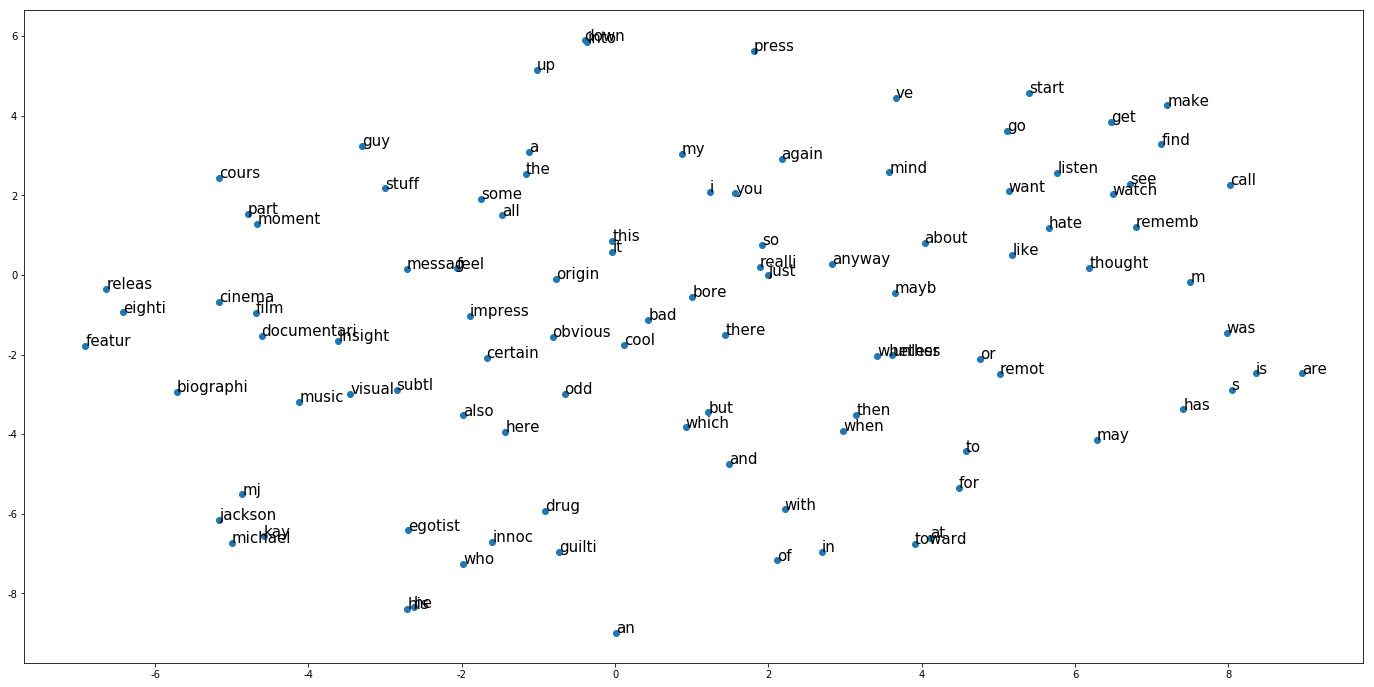

In [26]:
fig = plt.figure()
fig.set_size_inches(24,12)
ax = fig.add_subplot(1,1,1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=15)
plt.show()

## 평균 feature vector 구하기

In [32]:
import numpy as np

def makeFeatureVec(words, model, num_features):
    '''
    주어진 문장에서 단어 벡터의 평균을 구하는 함수
    '''
    featureVec = np.zeros((num_features,), dtype='float32')
    
    nwords = 0.
    # Index2word는 모델의 사전에 있는 단어 명을 담은 리스트이다.
    # 속도를 위해 set 형태로 초기화한다.
    index2word_set = set(model.wv.index2word)
    # 루프를 돌며 모델 사전에 포함되는 단어면 feature에 추가한다
    for word in words:
        if word in index2word_set:
            nwords += 1.
            featureVec = np.add(featureVec, model[word])
    # 결과를 단어 수로 나누어 평균을 구한다
    featureVec = np.divide(featureVec, nwords)
    
    return featureVec

In [28]:
def getAvgFeatureVecs(reviews, model, num_features):
    # 리뷰 단어 목록의 각각에 대한 평균 feature 벡터를 계산하고
    # 2D numpy 배열을 초기화 한다
    
    # counter 초기화
    counter = 0.
    # 속도를 위해 2D numpy 배열을 미리 할당
    reviewFeatureVecs = np.zeros((len(reviews), num_features), dtype='float32')
    
    for review in reviews:
        # 1000개마다 상태 출력
        if counter % 1000 == 0.:
            print("Review %d of %d" % (counter, len(reviews)))
        # 평균 feature 벡터를 만들기 위해 위에서 정의한 함수 호출
        reviewFeatureVecs[int(counter)] = makeFeatureVec(review, model, num_features)
        # 카운터 증가
        counter += 1.
    
    return reviewFeatureVecs

In [29]:
# 멀티쓰레드로 4개의 worker를 사용하여 처리
def getCleanReviews(reviews):
    clean_reviews = []
    clean_reviews = KaggleWord2VecUtility.apply_by_multiprocessing(
        reviews['review'], KaggleWord2VecUtility.review_to_wordlist, workers=4
    )
    
    return clean_reviews

In [33]:
%time trainDataVecs = getAvgFeatureVecs(getCleanReviews(train), model, num_features)

Review 0 of 25000
Review 1000 of 25000
Review 2000 of 25000
Review 3000 of 25000
Review 4000 of 25000
Review 5000 of 25000
Review 6000 of 25000
Review 7000 of 25000
Review 8000 of 25000
Review 9000 of 25000
Review 10000 of 25000
Review 11000 of 25000
Review 12000 of 25000
Review 13000 of 25000
Review 14000 of 25000
Review 15000 of 25000
Review 16000 of 25000
Review 17000 of 25000
Review 18000 of 25000
Review 19000 of 25000
Review 20000 of 25000
Review 21000 of 25000
Review 22000 of 25000
Review 23000 of 25000
Review 24000 of 25000
Wall time: 51.6 s


In [34]:
%time testDataVecs = getAvgFeatureVecs(getCleanReviews(test), model, num_features)

Review 0 of 25000
Review 1000 of 25000
Review 2000 of 25000
Review 3000 of 25000
Review 4000 of 25000
Review 5000 of 25000
Review 6000 of 25000
Review 7000 of 25000
Review 8000 of 25000
Review 9000 of 25000
Review 10000 of 25000
Review 11000 of 25000
Review 12000 of 25000
Review 13000 of 25000
Review 14000 of 25000
Review 15000 of 25000
Review 16000 of 25000
Review 17000 of 25000
Review 18000 of 25000
Review 19000 of 25000
Review 20000 of 25000
Review 21000 of 25000
Review 22000 of 25000
Review 23000 of 25000
Review 24000 of 25000
Wall time: 49.5 s


### 랜덤 포레스트 적용

In [35]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(
    n_estimators=100, n_jobs=-1, random_state=2018
)

In [36]:
%time forest = forest.fit(trainDataVecs, train['sentiment'])

Wall time: 4.49 s


In [37]:
from sklearn.model_selection import cross_val_score

%time score = np.mean(cross_val_score(forest, trainDataVecs, train['sentiment'], cv=10, scoring='roc_auc'))

Wall time: 42.3 s


In [38]:
score

0.8983178559999999

In [39]:
result = forest.predict(trainDataVecs)
output = pd.DataFrame(data={"id":train['id'], "sentiment":result})
output.head()

,id,sentiment
0,"""5814_8""",1
1,"""2381_9""",1
2,"""7759_3""",0
3,"""3630_4""",0
4,"""9495_8""",1


In [40]:
output_sentiment = output['sentiment'].value_counts()
print(output_sentiment[0] - output_sentiment[1])
output_sentiment

0


1    12500
0    12500
Name: sentiment, dtype: int64

In [41]:
output_sentiment[0]

12500